#### NAME: MAYUKH GHOSH
#### REG: 18BCE0417

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re

In [2]:
data = pd.read_csv("database.csv")

C:\Users\Mayukh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
attributes=(list(data))
attributes

['Record ID',
 'Incident Year',
 'Incident Month',
 'Incident Day',
 'Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Mass',
 'Engine Make',
 'Engine Model',
 'Engines',
 'Engine Type',
 'Engine1 Position',
 'Engine2 Position',
 'Engine3 Position',
 'Engine4 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Warning Issued',
 'Flight Phase',
 'Visibility',
 'Precipitation',
 'Height',
 'Speed',
 'Distance',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Flight Impact',
 'Fatalities',
 'Injuries',
 'Aircraft Damage',
 'Radome Strike',
 'Radome Damage',
 'Windshield Strike',
 'Windshield Damage',
 'Nose Strike',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Strike',
 'Wing or Rotor Damage',
 'Fuselage Strike',
 '

# What bird species has caused the most damage to airplanes?

In [4]:
species = data["Species Name"]
species_count=species.value_counts()
print(species_count)

UNKNOWN MEDIUM BIRD            38531
UNKNOWN SMALL BIRD             32981
MOURNING DOVE                   7653
GULL                            6580
UNKNOWN BIRD                    6400
                               ...  
HERMIT WARBLER                     1
INTERMEDIATE EGRET                 1
EASTERN SMALL-FOOTED MYOTIS        1
LITTLE OWL                         1
ALLIGATOR SNAPPING TURTLE          1
Name: Species Name, Length: 715, dtype: int64


In [5]:
species_count=species_count[species_count>4000]
print(species_count)

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
Name: Species Name, dtype: int64


In [6]:
top_species = ["UNKNOWN MEDIUM BIRD","UNKNOWN SMALL BIRD","MOURNING DOVE", "GULL","UNKNOWN BIRD","KILLDEER", "AMERICAN KESTREL","BARN SWALLOW"]
top_species = species[species.isin(top_species)]
print(top_species.value_counts())

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
Name: Species Name, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

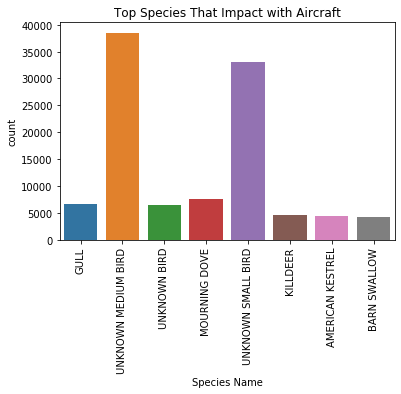

In [7]:
sns.countplot(top_species)
plt.title("Top Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

We can see that there are some unknow medium birds which effect the aircraft the most, but our objective is to know the known
species

In [8]:
top_known_species = ["MOURNING DOVE", "GULL","KILLDEER", "AMERICAN KESTREL","BARN SWALLOW"]
top_known_species = species[species.isin(top_known_species)]
print(top_known_species.value_counts())

MOURNING DOVE       7653
GULL                6580
KILLDEER            4562
AMERICAN KESTREL    4476
BARN SWALLOW        4215
Name: Species Name, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

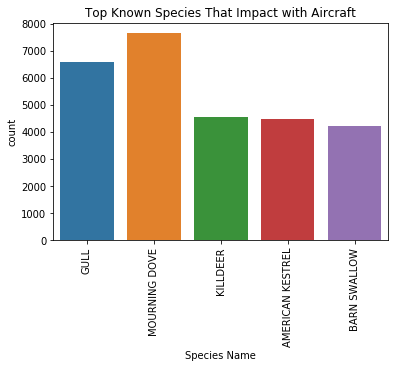

In [9]:
sns.countplot(top_known_species)
plt.title("Top Known Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

### CONCLUSION:

#### From the above graph it is clear that "MOURNING DOVE" species of birds effect the aircrafts the most

# Which part of the airplane is most prone to damage in wildlife strikes?

In [10]:
attributes=(list(data))
attributes

['Record ID',
 'Incident Year',
 'Incident Month',
 'Incident Day',
 'Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Mass',
 'Engine Make',
 'Engine Model',
 'Engines',
 'Engine Type',
 'Engine1 Position',
 'Engine2 Position',
 'Engine3 Position',
 'Engine4 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Warning Issued',
 'Flight Phase',
 'Visibility',
 'Precipitation',
 'Height',
 'Speed',
 'Distance',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Flight Impact',
 'Fatalities',
 'Injuries',
 'Aircraft Damage',
 'Radome Strike',
 'Radome Damage',
 'Windshield Strike',
 'Windshield Damage',
 'Nose Strike',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Strike',
 'Wing or Rotor Damage',
 'Fuselage Strike',
 '

In [11]:
damage_x=[]
strike_x=[]
dam=".*Damage$"
stri=".*Strike$"
for i in attributes:
    if (re.match(dam, i)):
        damage_x.append(i)
    elif (re.match(stri, i)):
        strike_x.append(i)
        

In [12]:
damage_x

['Aircraft Damage',
 'Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

We are not interested with the column of Aircraft Damage

In [13]:
damage_x=damage_x[1:]
damage_x

['Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [14]:
strike_x

['Radome Strike',
 'Windshield Strike',
 'Nose Strike',
 'Engine1 Strike',
 'Engine2 Strike',
 'Engine3 Strike',
 'Engine4 Strike',
 'Propeller Strike',
 'Wing or Rotor Strike',
 'Fuselage Strike',
 'Landing Gear Strike',
 'Tail Strike',
 'Lights Strike',
 'Other Strike']

In [15]:
damage_y=[]
strike_y=[]
for i in strike_x:
    strike_y.append(data[i].sum())

for i in damage_x:
    damage_y.append(data[i].sum())
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

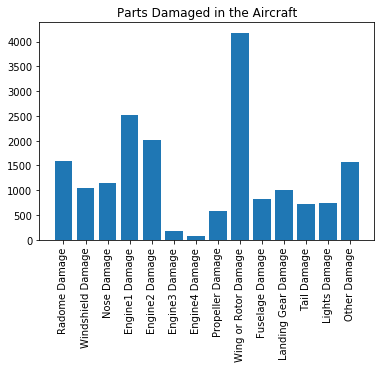

In [16]:
plt.bar(damage_x,damage_y)
plt.title("Parts Damaged in the Aircraft")
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

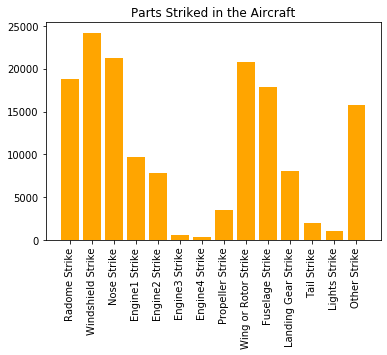

In [17]:
plt.bar(strike_x,strike_y,color='orange')
plt.title("Parts Striked in the Aircraft")
plt.xticks(rotation='vertical')

In [18]:
damage_per_strike=[]
parts=[]
for i in range(0,len(strike_x)):
    damage_per_strike.append(damage_y[i]/strike_y[i])
    parts.append(strike_x[i][:-7])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

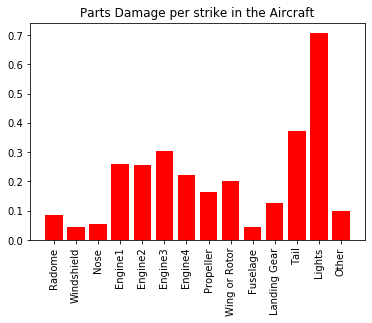

In [19]:
plt.bar(parts,damage_per_strike,color='red')
plt.title("Parts Damage per strike in the Aircraft")
plt.xticks(rotation='vertical')

### CONCLUSION:

#### From the Graphs above we can see that the part that reports most cases of damage in a wildlife strike is 'Wings or Rotor'

#### Though most of the strikes are usually on the 'Windshield'

#### But the most prone to damage are the 'Lights', they get damaged in approximately 70% of the strikes